# LEAF CLASSIFICATION

**The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants.**

Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. 

1. first step, try building a classifier that uses the provided pre-extracted features.
2. Next, try creating a set of your own features. Finally, examine the errors you're making and see what you can do to improve.

# EVALUATION SCHEME

Submissions are evaluated using the multi-class logarithmic loss. 
**LOGLOSS**
LINK : https://www.kaggle.com/c/leaf-classification#evaluation

# SUBMISSION SCHEME

Submit a csv file with the image id, all candidate species names, and a probability for each species.


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
%matplotlib inline

/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
TrainImgPath = './images/'
TrainData = pd.read_csv('./train.csv')
TestData = pd.read_csv('./test.csv')

In [3]:
TrainData.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
TrainData.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [5]:
# Now Checking For Any Missing Values
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())

Training Dataset Missing Value Columns:
id           0
species      0
margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
margin6      0
margin7      0
margin8      0
margin9      0
margin10     0
margin11     0
margin12     0
margin13     0
margin14     0
margin15     0
margin16     0
margin17     0
margin18     0
margin19     0
margin20     0
margin21     0
margin22     0
margin23     0
margin24     0
margin25     0
margin26     0
margin27     0
margin28     0
            ..
texture35    0
texture36    0
texture37    0
texture38    0
texture39    0
texture40    0
texture41    0
texture42    0
texture43    0
texture44    0
texture45    0
texture46    0
texture47    0
texture48    0
texture49    0
texture50    0
texture51    0
texture52    0
texture53    0
texture54    0
texture55    0
texture56    0
texture57    0
texture58    0
texture59    0
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


In [6]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)

Training Dataset Shape:
(990, 194)


Training Dataset Columns/Features:
id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
margin4      float64
margin5      float64
margin6      float64
margin7      float64
margin8      float64
margin9      float64
margin10     float64
margin11     float64
margin12     float64
margin13     float64
margin14     float64
margin15     float64
margin16     float64
margin17     float64
margin18     float64
margin19     float64
margin20     float64
margin21     float64
margin22     float64
margin23     float64
margin24     float64
margin25     float64
margin26     float64
margin27     float64
margin28     float64
              ...   
texture35    float64
texture36    float64
texture37    float64
texture38    float64
texture39    float64
texture40    float64
texture41    float64
texture42    float64
texture43    float64
texture44    float64
texture45    float64
texture46    float64
texture47    float64
text

In [7]:
TestData.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [8]:
# Now Checking For Any Missing Values
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Test Dataset Missing Value Columns:
id           0
margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
margin6      0
margin7      0
margin8      0
margin9      0
margin10     0
margin11     0
margin12     0
margin13     0
margin14     0
margin15     0
margin16     0
margin17     0
margin18     0
margin19     0
margin20     0
margin21     0
margin22     0
margin23     0
margin24     0
margin25     0
margin26     0
margin27     0
margin28     0
margin29     0
            ..
texture35    0
texture36    0
texture37    0
texture38    0
texture39    0
texture40    0
texture41    0
texture42    0
texture43    0
texture44    0
texture45    0
texture46    0
texture47    0
texture48    0
texture49    0
texture50    0
texture51    0
texture52    0
texture53    0
texture54    0
texture55    0
texture56    0
texture57    0
texture58    0
texture59    0
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64


In [9]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)

Test Dataset Shape:
(594, 193)


Test Dataset Columns/Features:
id             int64
margin1      float64
margin2      float64
margin3      float64
margin4      float64
margin5      float64
margin6      float64
margin7      float64
margin8      float64
margin9      float64
margin10     float64
margin11     float64
margin12     float64
margin13     float64
margin14     float64
margin15     float64
margin16     float64
margin17     float64
margin18     float64
margin19     float64
margin20     float64
margin21     float64
margin22     float64
margin23     float64
margin24     float64
margin25     float64
margin26     float64
margin27     float64
margin28     float64
margin29     float64
              ...   
texture35    float64
texture36    float64
texture37    float64
texture38    float64
texture39    float64
texture40    float64
texture41    float64
texture42    float64
texture43    float64
texture44    float64
texture45    float64
texture46    float64
texture47    float64
texture48   

In [10]:
TrainData.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


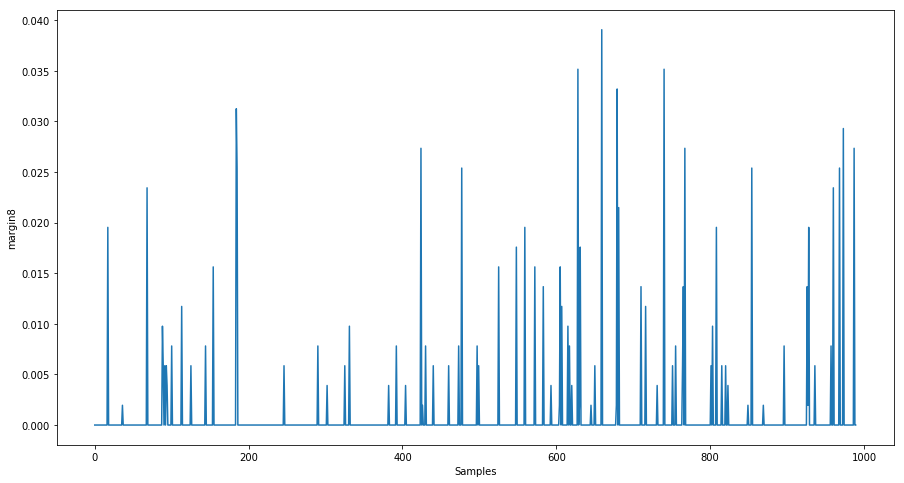

In [11]:
plt.figure(figsize=[15,8]) 
plt.plot(TrainData['margin23'])
plt.ylabel("margin8")
plt.xlabel("Samples")
plt.show()

In [12]:
TrainData.columns[2:]

Index(['margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9', 'margin10',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=192)

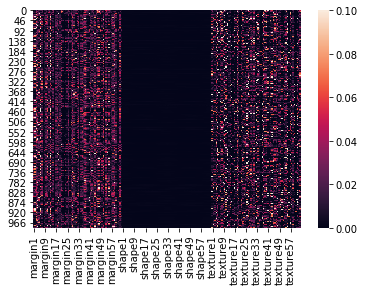

In [13]:
#sns.set()
ax = sns.heatmap(TrainData[TrainData.columns[2:]], vmin=0.00000, vmax=0.1)

In [14]:
from matplotlib import cm as cm
cmap = cm.get_cmap('jet', 30)

In [15]:
TrainData.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.002419,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
margin6,-0.051818,0.767718,0.825762,-0.163976,-0.261437,-0.438587,1.000000,-0.093780,-0.112896,-0.136961,...,0.214571,-0.057067,0.138776,-0.035407,-0.207390,0.066262,-0.050498,-0.031555,-0.132087,-0.003164
margin7,0.061214,0.066273,-0.083273,0.095449,-0.268271,-0.108178,-0.093780,1.000000,0.099867,-0.350804,...,-0.056694,-0.134651,0.010123,0.064425,0.056026,-0.034094,-0.163375,0.015391,-0.001364,0.068512
margin8,-0.039509,-0.094137,-0.086428,0.024350,-0.047693,0.056557,-0.112896,0.099867,1.000000,-0.071887,...,-0.030825,-0.034472,-0.018269,-0.054561,-0.035706,0.048647,-0.079283,-0.048843,0.027758,-0.003191
margin9,-0.070954,-0.181496,-0.120276,-0.000042,0.227543,0.196745,-0.136961,-0.350804,-0.071887,1.000000,...,0.061357,0.139813,0.084557,-0.090558,0.019258,-0.028292,0.088517,-0.031954,-0.119494,-0.097760


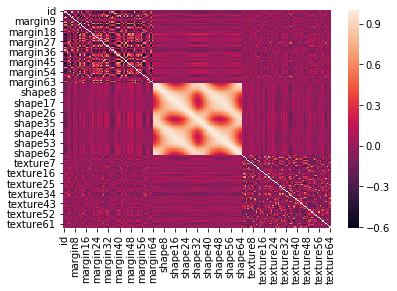

In [16]:
sns.heatmap(TrainData.corr())

In [17]:
# import matplotlib.image as mpimg
# import cv2

In [18]:
# plt.imshow(mpimg.imread(TrainImgPath + '4.jpg'))
# plt.figure()
# plt.imshow(cv2.imread(TrainImgPath + '4.jpg'))

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
TrainData.head(1)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [21]:
target = TrainData['species']
train_id = TrainData['id']

encoder = LabelEncoder()
le = encoder.fit(target)
labels = le.transform(target)
classes = list(le.classes_)

In [22]:
TestData.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [23]:
y_train = encoder.fit_transform(target)
cl = list(encoder.classes_)

In [24]:
cl

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [25]:
classes # This gives us the power of encoding and getting the classes from our labels very easy

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [26]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [27]:
x_train = TrainData.drop(['id', 'species'], axis = 1)

In [28]:
x_train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [29]:
TestData.head(1)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.0,0.015625,0.000977,0.015625,0.0,0.0,0.0,0.003906,0.053711


In [30]:
target.unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [33]:
test_ids = TestData['id']
TestData = TestData.drop('id', axis=1)

In [34]:
pred = clf.predict_proba(x_train)

/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [35]:
y_train

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [36]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [37]:
np.unique(pred)

array([  0.00000000e+000,   1.78684455e-309,   2.32344350e-309, ...,
         1.00000000e+000,   1.00000000e+000,   1.00000000e+000])

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
log_loss(y_train,pred)

0.8724657484078181

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [41]:
clf1 = QuadraticDiscriminantAnalysis()
clf1.fit(x_train, y_train)

/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [42]:
pred1 = clf1.predict_proba(x_train)

In [43]:
log_loss(y_train, pred1)

1.0341559258774077e-13

In [44]:
clf2 = xgb.XGBClassifier()
clf2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [45]:
pred2 = clf2.predict_proba(x_train)

In [46]:
log_loss(y_train, pred2)

0.050758311641637723

In [47]:
favorite_clf = xgb.XGBClassifier(n_estimators=500)
favorite_clf.fit(x_train, y_train)
test_predictions = favorite_clf.predict_proba(TestData)

In [48]:
log_loss(y_train, favorite_clf.predict_proba(x_train))

0.050618612425721653

In [49]:
# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

,index,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,4,0.010375,0.005872,0.005381,0.082759,0.005988,0.007476,0.006094,0.004941,...,0.005600,0.011588,0.005229,0.004887,0.005602,0.005759,0.004914,0.004264,0.015040,0.005688
1,1,7,0.000356,0.000384,0.001956,0.000689,0.001095,0.000444,0.001822,0.000382,...,0.000432,0.000862,0.000404,0.000377,0.000415,0.000760,0.000379,0.000677,0.000415,0.000439
2,2,9,0.001522,0.785876,0.001938,0.002387,0.006434,0.001391,0.001434,0.001660,...,0.001318,0.001267,0.001231,0.001210,0.002147,0.001021,0.001753,0.001004,0.001266,0.007749
3,3,12,0.003084,0.004473,0.002217,0.004068,0.006700,0.002014,0.002511,0.002956,...,0.002307,0.002218,0.002154,0.001840,0.002846,0.003562,0.010567,0.001701,0.002463,0.007680
4,4,13,0.000711,0.002021,0.000500,0.000416,0.000557,0.000455,0.000740,0.000481,...,0.000869,0.000501,0.000897,0.000478,0.001320,0.000763,0.000831,0.000384,0.000500,0.000445
5,5,16,0.009947,0.006916,0.007484,0.113649,0.008328,0.006800,0.008476,0.006872,...,0.007789,0.007487,0.007272,0.008085,0.007476,0.010742,0.006834,0.007626,0.008624,0.010184
6,6,19,0.002137,0.001272,0.001377,0.859342,0.001532,0.001251,0.001559,0.001264,...,0.001433,0.002964,0.001338,0.001250,0.001375,0.001109,0.001351,0.001091,0.001586,0.001873
7,7,23,0.002944,0.002932,0.002796,0.004041,0.002991,0.027797,0.003044,0.002468,...,0.002797,0.002689,0.002611,0.002230,0.002685,0.002165,0.002454,0.002129,0.002686,0.002841
8,8,24,0.000490,0.000674,0.000699,0.000368,0.000531,0.000595,0.000518,0.001625,...,0.000476,0.000457,0.000444,0.000415,0.000476,0.000874,0.000417,0.000351,0.000457,0.000406
9,9,28,0.012257,0.008047,0.006969,0.003825,0.008505,0.006026,0.006736,0.009701,...,0.007954,0.004557,0.007317,0.004350,0.008377,0.026295,0.008700,0.003495,0.004553,0.012529


In [50]:
# Export Submission
submission.to_csv('submission.csv', index = False)
submission.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010375,0.005872,0.005381,0.082759,0.005988,0.007476,0.006094,0.004941,0.005147,...,0.005600,0.011588,0.005229,0.004887,0.005602,0.005759,0.004914,0.004264,0.015040,0.005688
1,7,0.000356,0.000384,0.001956,0.000689,0.001095,0.000444,0.001822,0.000382,0.000362,...,0.000432,0.000862,0.000404,0.000377,0.000415,0.000760,0.000379,0.000677,0.000415,0.000439
2,9,0.001522,0.785876,0.001938,0.002387,0.006434,0.001391,0.001434,0.001660,0.003705,...,0.001318,0.001267,0.001231,0.001210,0.002147,0.001021,0.001753,0.001004,0.001266,0.007749
3,12,0.003084,0.004473,0.002217,0.004068,0.006700,0.002014,0.002511,0.002956,0.007218,...,0.002307,0.002218,0.002154,0.001840,0.002846,0.003562,0.010567,0.001701,0.002463,0.007680
4,13,0.000711,0.002021,0.000500,0.000416,0.000557,0.000455,0.000740,0.000481,0.021852,...,0.000869,0.000501,0.000897,0.000478,0.001320,0.000763,0.000831,0.000384,0.000500,0.000445


# This function is used to delete correlated variable based on a Threshold Value

This function is based on variance_inflation_factor.
**Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.** Use to describe how much multicollinearity (correlation between predictors) exists in a regression analysis. Multicollinearity is problematic because it can increase the variance of the regression coefficients, making them unstable and difficult to interpret.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

            
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [52]:
x_train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [53]:
x = x_train.copy()

In [54]:
x.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [56]:
f = calculate_vif_(x, thresh=100)

dropping 'texture12' at index: 139
dropping 'shape7' at index: 70
dropping 'shape4' at index: 67
dropping 'shape62' at index: 123
dropping 'shape26' at index: 87
dropping 'shape30' at index: 90
dropping 'shape58' at index: 117
dropping 'shape9' at index: 70
dropping 'shape24' at index: 84
dropping 'shape28' at index: 86
dropping 'shape60' at index: 115
dropping 'shape39' at index: 95
dropping 'shape35' at index: 91
dropping 'shape21' at index: 81
dropping 'shape12' at index: 72
dropping 'shape2' at index: 65
dropping 'shape47' at index: 98
dropping 'shape44' at index: 95
dropping 'shape56' at index: 105
dropping 'shape54' at index: 103
dropping 'shape37' at index: 89
dropping 'shape32' at index: 85
dropping 'shape51' at index: 98
dropping 'shape14' at index: 72
dropping 'shape41' at index: 89
dropping 'shape64' at index: 103
dropping 'shape19' at index: 76
dropping 'shape49' at index: 93
dropping 'shape5' at index: 66
dropping 'shape16' at index: 72
dropping 'shape10' at index: 68
drop

In [57]:
f.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [58]:
favorite_clf = xgb.XGBClassifier(n_estimators=800)
favorite_clf.fit(f, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=800, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [59]:
f.columns

Index(['margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9', 'margin10',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=132)

In [60]:
g = TestData[f.columns]

In [61]:
g.columns

Index(['margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9', 'margin10',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=132)

In [62]:
# g = calculate_vif_(TestData, thresh=100)
test_predictions = favorite_clf.predict_proba(g)

In [63]:
log_loss(y_train, favorite_clf.predict_proba(f))

0.050651485081573931

In [64]:
# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=classes)
submission.insert(0, 'id', test_ids)
submission.reset_index()

,index,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,4,0.010138,0.005410,0.004619,0.057530,0.005804,0.006235,0.005413,0.004810,...,0.005404,0.010634,0.005022,0.005186,0.006813,0.005471,0.004690,0.004206,0.014857,0.005267
1,1,7,0.000467,0.000517,0.002814,0.001639,0.001598,0.000531,0.003871,0.000500,...,0.000562,0.001179,0.000561,0.000455,0.000514,0.000871,0.000488,0.000970,0.000543,0.000572
2,2,9,0.001425,0.794648,0.001253,0.002432,0.004019,0.001372,0.001228,0.001634,...,0.001226,0.001196,0.001139,0.001248,0.001932,0.000984,0.001774,0.000975,0.001186,0.007252
3,3,12,0.000702,0.001035,0.000440,0.000968,0.001758,0.000449,0.000516,0.000661,...,0.000515,0.000516,0.000478,0.000399,0.000761,0.001316,0.002051,0.000539,0.000557,0.001595
4,4,13,0.000568,0.001628,0.000358,0.000338,0.000468,0.000365,0.001116,0.000428,...,0.000698,0.000408,0.000718,0.000457,0.001193,0.000673,0.000752,0.000303,0.000405,0.000370
5,5,16,0.009790,0.007257,0.006738,0.158976,0.008465,0.006882,0.007895,0.007015,...,0.007882,0.007907,0.007324,0.008095,0.007205,0.009559,0.007042,0.008256,0.008817,0.009645
6,6,19,0.001555,0.001027,0.000953,0.890424,0.001198,0.000974,0.001117,0.000993,...,0.001115,0.002195,0.001036,0.001053,0.001020,0.000870,0.001151,0.000887,0.001248,0.001365
7,7,23,0.002513,0.002377,0.002870,0.003408,0.002550,0.028314,0.002379,0.002207,...,0.002375,0.002317,0.002207,0.001978,0.002171,0.001853,0.002061,0.001848,0.002297,0.002314
8,8,24,0.000423,0.000532,0.000399,0.000306,0.000420,0.000470,0.000392,0.001958,...,0.000391,0.000381,0.000377,0.000341,0.000530,0.000722,0.000339,0.000283,0.000378,0.000335
9,9,28,0.012139,0.008065,0.004791,0.003720,0.008204,0.005960,0.012145,0.010887,...,0.007638,0.004442,0.007024,0.004635,0.007771,0.047596,0.008034,0.003298,0.004404,0.013644


In [65]:
# Export Submission
submission.to_csv('submission.csv', index = False)
submission.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010138,0.005410,0.004619,0.057530,0.005804,0.006235,0.005413,0.004810,0.004978,...,0.005404,0.010634,0.005022,0.005186,0.006813,0.005471,0.004690,0.004206,0.014857,0.005267
1,7,0.000467,0.000517,0.002814,0.001639,0.001598,0.000531,0.003871,0.000500,0.000471,...,0.000562,0.001179,0.000561,0.000455,0.000514,0.000871,0.000488,0.000970,0.000543,0.000572
2,9,0.001425,0.794648,0.001253,0.002432,0.004019,0.001372,0.001228,0.001634,0.004004,...,0.001226,0.001196,0.001139,0.001248,0.001932,0.000984,0.001774,0.000975,0.001186,0.007252
3,12,0.000702,0.001035,0.000440,0.000968,0.001758,0.000449,0.000516,0.000661,0.001350,...,0.000515,0.000516,0.000478,0.000399,0.000761,0.001316,0.002051,0.000539,0.000557,0.001595
4,13,0.000568,0.001628,0.000358,0.000338,0.000468,0.000365,0.001116,0.000428,0.021998,...,0.000698,0.000408,0.000718,0.000457,0.001193,0.000673,0.000752,0.000303,0.000405,0.000370


# Results
<img src="./Results.png">